# Finding heavy traffic on the i-94

In this project, I will be using dataset about the westbound traffic on the I-94 Interstate highway to determine a few indicators of heavy traffic on I-94. The i-94 is east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. The data can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [19]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [20]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [21]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Initial observations
From preliminary examinations above, I can see that the dataset has 9 columns, 48202 rows and no null values. One datecolumn and other column containing information relating to weather. I will examine each of the columns to find out if they have any bearing on the traffic starting with the datetime column

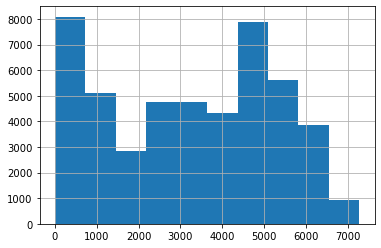

In [22]:
i_94['traffic_volume'].hist()
plt.show()

In [23]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# Transforming the date time column

In [25]:
i_94['date_time'] = pd.to_datetime(i_94['date_time']) #transforming the date_time column to type date_time

In [26]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7)& (i_94['date_time'].dt.hour < 19)]
print(day.shape)#extracting the daytime hours from the datetime column

(23877, 9)


In [27]:
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)#extracting the night timehours from the datetime column

(24327, 9)


# Plotting date time and Night time data

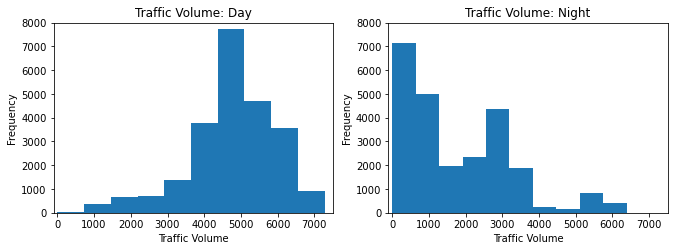

In [28]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()


Looking at the charts above,the frequency of traffic volume at night is not as high as during the during the day,and because we are interested in heavy traffic, we will focus on traffic during the day moving forward.

# Traffic by Month

In [29]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='month'>

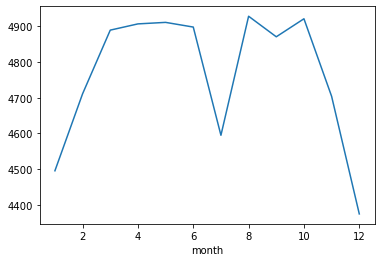

In [30]:
by_month['traffic_volume'].plot()

Traffic is genarally higher from March to October and then starts to drop off after October.

In [14]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

# Traffic Volume on Days of the week

<AxesSubplot:xlabel='dayofweek'>

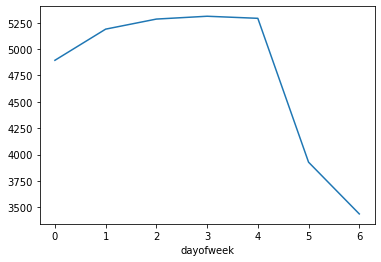

In [34]:
by_dayofweek['traffic_volume'].plot()

Looks like traffic are usually high on weekdays and declineson weekends, I will examine this more closely in the next cells.

In [12]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Looking at the numbers above, we can infer that traffic volume is higher on weekdays than Weekdays. The lowest traffic volume on weekdays is higher than the highest on weekends.

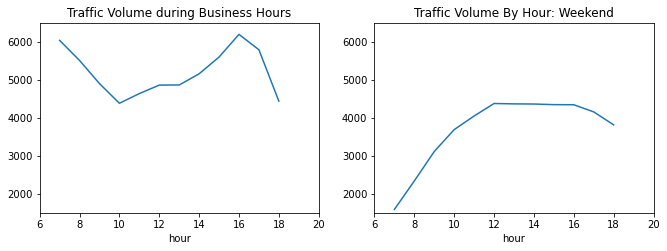

In [13]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title("Traffic Volume during Business Hours")
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()


From the time analysis of the data from the above, we can infer the following:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.
Another possible indicator of heavy traffic is weather. I will use the columns containing the data for the next part of the analysis, for the numerical columns we will calculate the correlation using scatter plots.

In [14]:
numerical_weather = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']

In [15]:
i_94.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

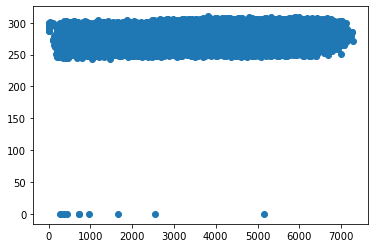

In [16]:
plt.scatter(data = i_94, x ='traffic_volume',y ="temp")

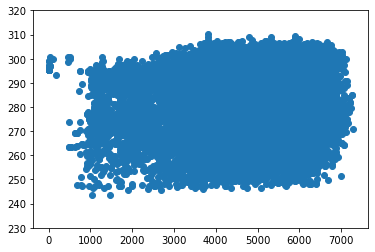

In [17]:
plt.scatter(data = day, x ='traffic_volume',y ="temp")
plt.ylim(230, 320)
plt.show()

There does not seem to be any correlation these columns and traffic, I will be using the categorical columns to find any relationship between traffic and weather.

In [36]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [40]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
weather_main,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344


<AxesSubplot:xlabel='weather_main'>

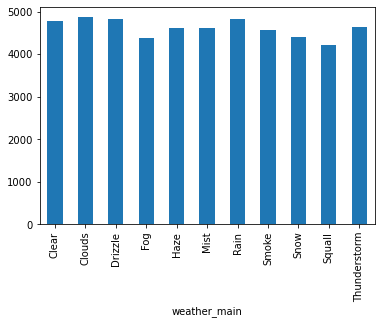

In [19]:
by_weather_main['traffic_volume'].plot.bar()

Generally, the traffic distribution for the weather conditions above look to be the same. 

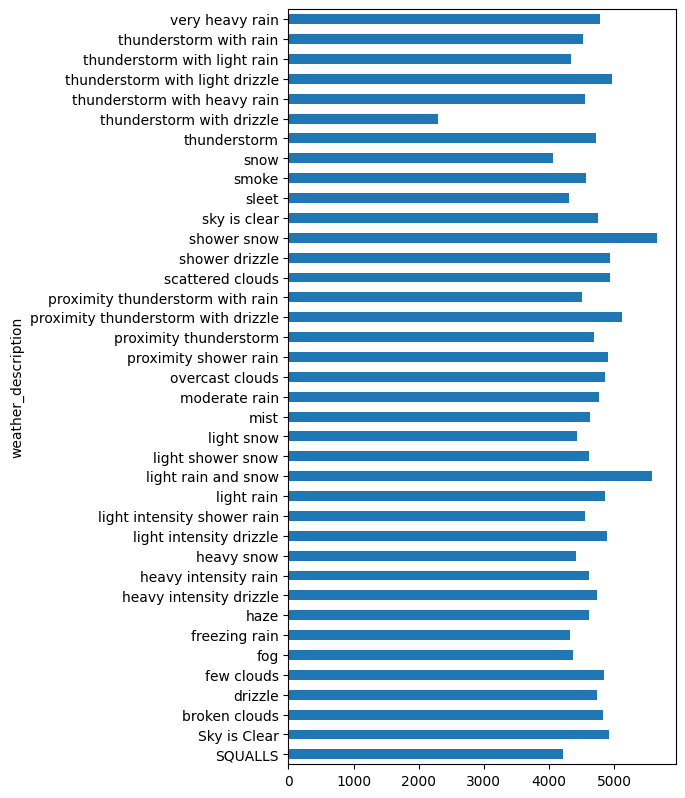

In [61]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

While the distribution also generally looks the same, we have some weather with high traffic volume above 5000 during some weather descriptions.

# Conclusion

We can conclude that the following factors can be indicative of high traffic volume:
    - Month of the year(March - October have higher traffic volumes)
    - Day of the Week; traffic volumes are higher on Weekdays
    - Time of the day;daylight hours have higher traffic conditions
    - Weather conditions like rain and thunderstorm